<a href="https://colab.research.google.com/github/19marquee/rabbit-challenge/blob/main/machine-learning/nonlinear_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# レポート 機械学習/非線形回帰モデル


## 100文字以内の要点のまとめ

- 曲線で回帰を行う。
- 線形ではとらえられない、複雑な非線形構造を扱う。
- 基底展開法は、基底関数と呼ばれる既知の非線形関数とパラメータベクトルの線型結合を使用する。
- 基底関数には、多項式関数、ガウス型基底関数等がある。
多項式関数：$\Phi_j = x^j$、ガウス型基底関数：$\Phi_j(x) = \exp(\dfrac{(x-\mu_j)^2}{2h_j})$
- 線形回帰と同様に、最小2乗法や最尤法により未知の重みパラメータを推定する。
- 基底展開法も線形回帰と同じ枠組みで推定可能である。
- 学習データに対して、十分小さな誤差が得られていない場合、未学習であると推測できる
- 小さな誤差は得られたけど、テスト（検証）誤差との差が大きい場合、過学習であると水族出来る。
- 過学習を抑制するための対策として、学習データの数を増やす、不要な基底関数を削除する、正則化法が挙げられる。
- 学習データの数を増やす、不要な基底関数を削除する、はそれぞれデータの増加、モデルの表現力を下げることにより学習データへのオーバーフィッティング（過学習）を抑える手法。
- 正則化法は、損失関数に制約をかける（重みパラメータのL1ノルムやL2ノルムを加える）ことで過学習を抑える手法。
- ホールドアウト法は、有限のデータを学習用と検証用の2つに分割し、モデルの精度やエラー率を求め、モデルの良し悪しを判断するための手法。クロスバリデーションは、データを複数に分割しグループに対して、学習用、検証用を入れ替えていくことで、モデルの良し悪し（妥当性）を評価する手法。

##実習演習結果

#### Googleドライブのマウント

In [62]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [63]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [64]:
#seaborn設定
sns.set()
#背景変更
sns.set_style("darkgrid", {'grid.linestyle': '--'})
#大きさ(スケール変更)
sns.set_context("paper")

####データの生成

$f(x) = 1-48x+218x^2-315x^3+145x^4$からデータをサンプリングし、ノイズを加えることで、非線形データを生成する。

In [65]:
n=100

def true_func(x):
    z = 1-48*x+218*x**2-315*x**3+145*x**4
    return z 

def linear_func(x):
    z = x
    return z 

No handles with labels found to put in legend.


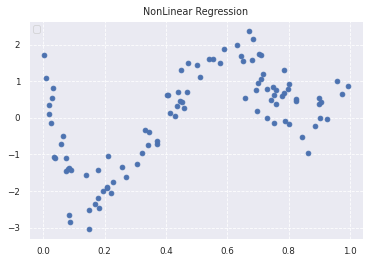

In [66]:
# 真の関数からノイズを伴うデータを生成

# 真の関数からデータ生成
data = np.random.rand(n).astype(np.float32)
data = np.sort(data)
target = true_func(data)

# 　ノイズを加える
noise = 0.5 * np.random.randn(n) 
target = target  + noise

# ノイズ付きデータを描画

plt.scatter(data, target)

plt.title('NonLinear Regression')
plt.legend(loc=2)

####線形回帰

0.3169368329850285


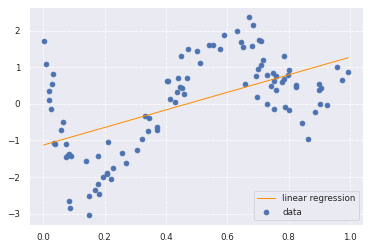

In [67]:
from sklearn.linear_model import LinearRegression

clf = LinearRegression()
data = data.reshape(-1,1)
target = target.reshape(-1,1)
clf.fit(data, target)

p_lin = clf.predict(data)

plt.scatter(data, target, label='data')
plt.plot(data, p_lin, color='darkorange', marker='', linestyle='-', linewidth=1, markersize=6, label='linear regression')
plt.legend()
print(clf.score(data, target))

線形回帰では、直線でしか回帰できないため、非線形構造には対応できていない。

####カーネルリッジ回帰

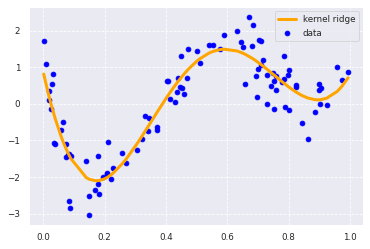

In [68]:
from sklearn.kernel_ridge import KernelRidge

clf = KernelRidge(alpha=0.0002, kernel='rbf')
clf.fit(data, target)

p_kridge = clf.predict(data)

plt.scatter(data, target, color='blue', label='data')

plt.plot(data, p_kridge, color='orange', linestyle='-', linewidth=3, markersize=6, label='kernel ridge')
plt.legend()
#plt.plot(data, p, color='orange', marker='o', linestyle='-', linewidth=1, markersize=6)

####リッジ回帰

L2ノルムによるリッジ回帰を行う。

0.7840386008986493


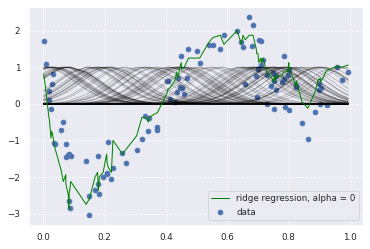

0.8520711914218829


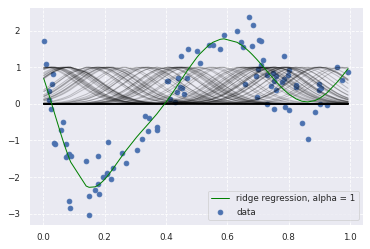

0.8315124687538847


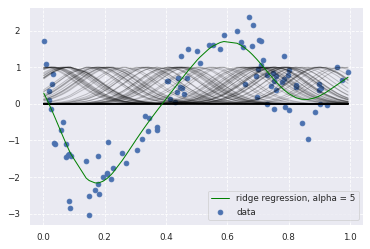

0.787045290961305


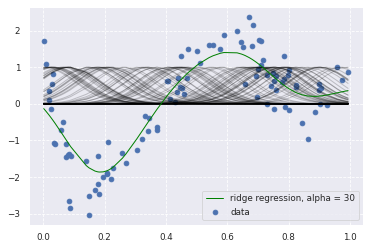

In [101]:
#Ridge

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Ridge

kx = rbf_kernel(X=data, Y=data, gamma=50)
#KX = rbf_kernel(X, x)
alpha = [0, 1, 5, 30]
for a in alpha:
    #clf = LinearRegression()
    clf = Ridge(alpha=a)
    clf.fit(kx, target)

    p_ridge = clf.predict(kx)

    plt.scatter(data, target,label='data')
    for i in range(len(kx)):
        plt.plot(data, kx[i], color='black', linestyle='-', linewidth=1, markersize=3, alpha=0.2)

    #plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
    plt.plot(data, p_ridge, color='green', linestyle='-', linewidth=1, markersize=3,label='ridge regression, alpha = %d' % (a))
    #plt.legend()

    print(clf.score(kx, target))
    plt.legend()
    plt.show()

ハイパーパラメータであるalphaを0にする（正則化項を削除）と、過学習が確認できる。

####多項式関数モデルによる非線形回帰

1次から、10次の多項式関数モデルで回帰を行い、それぞれのグラフを可視化。

In [70]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline

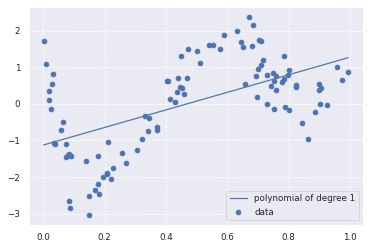

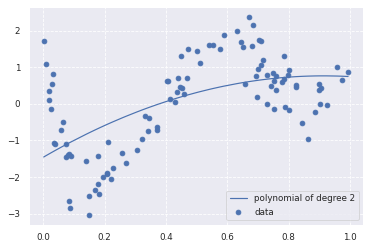

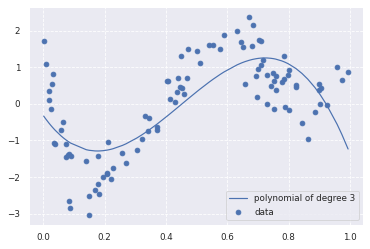

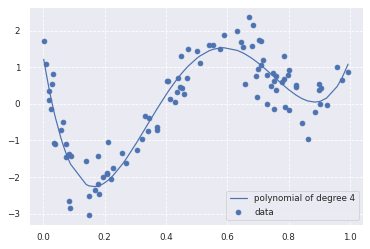

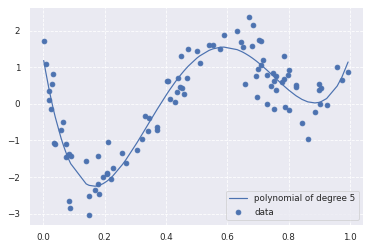

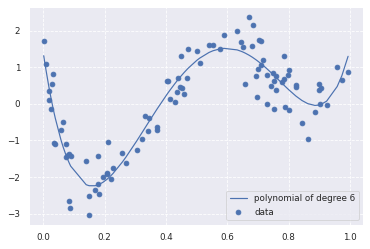

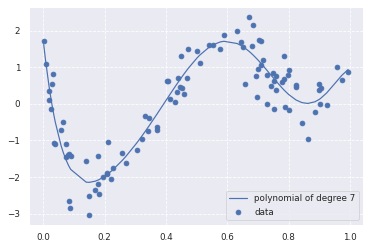

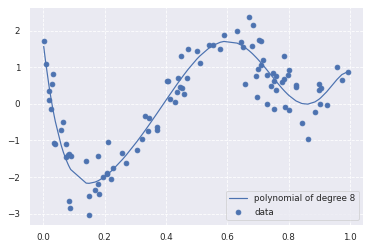

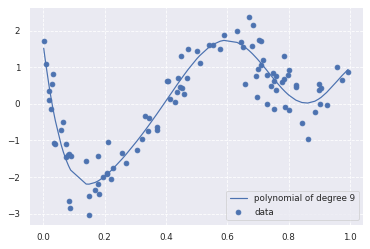

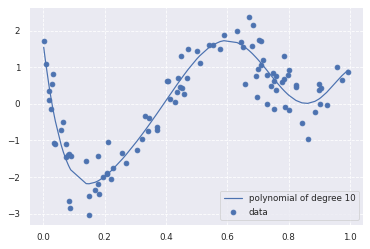

In [81]:
#PolynomialFeatures(degree=1)

deg = [1,2,3,4,5,6,7,8,9,10]
for d in deg:
    regr = Pipeline([
        ('poly', PolynomialFeatures(degree=d)),
        ('linear', LinearRegression())
    ])
    regr.fit(data, target)
    # make predictions
    p_poly = regr.predict(data)
    # plot regression result
    plt.scatter(data, target, label='data')
    plt.plot(data, p_poly, label='polynomial of degree %d' % (d))
    plt.legend()
    plt.show()

4次以上の多項式関数で訓練データの分布にフィッティングしている関数を導出できている。

####ラッソ回帰

0.0


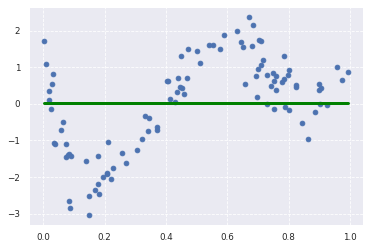

In [72]:
#Lasso

from sklearn.metrics.pairwise import rbf_kernel
from sklearn.linear_model import Lasso

kx = rbf_kernel(X=data, Y=data, gamma=5)
#KX = rbf_kernel(X, x)

#lasso_clf = LinearRegression()
lasso_clf = Lasso(alpha=10000, max_iter=1000)
lasso_clf.fit(kx, target)

p_lasso = lasso_clf.predict(kx)

plt.scatter(data, target)

#plt.plot(data, p, color='green', marker='o', linestyle='-', linewidth=0.1, markersize=3)
plt.plot(data, p_lasso, color='green', linestyle='-', linewidth=3, markersize=3)

print(lasso_clf.score(kx, target))

####SVMによる回帰

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


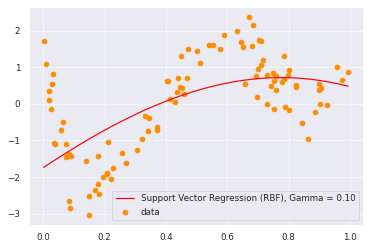

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


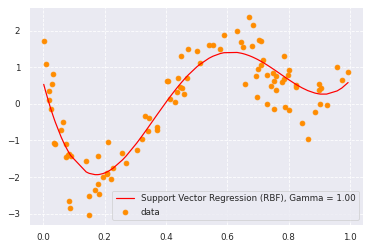

In [104]:
from sklearn import model_selection, preprocessing, linear_model, svm

gamma = [0.1, 1.0]
for g in gamma:
    # SVR-rbf
    clf_svr = svm.SVR(kernel='rbf', C=1e3, gamma=g, epsilon=0.1)
    clf_svr.fit(data, target)
    y_rbf = clf_svr.fit(data, target).predict(data)
    # plot
    plt.scatter(data, target, color='darkorange', label='data')
    plt.plot(data, y_rbf, color='red', label='Support Vector Regression (RBF), Gamma = %.2f' % (g))
    plt.legend()
    plt.show()

グラフより、ハイパーパラメータgammaの値は、0.1より1.0の方がより良いモデルが得られていると推測できる。

####ニューラルネットワーク（深層学習）モデルによる非線形回帰

全結合層を積み重ねたニューラルネットワークモデルで学習を行う。
非線形の活性化関数には、reluを用いる。

In [74]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(data, target, test_size=0.1, random_state=0)

以下では，Googleドライブのマイドライブ直下にstudy_ai_mlフォルダを置くことを仮定しています．必要に応じて，パスを変更してください。

In [75]:
from keras.callbacks import EarlyStopping, TensorBoard, ModelCheckpoint

cb_cp = ModelCheckpoint('/content/drive/My Drive/study_ai_ml_google/skl_ml/out/checkpoints/weights.{epoch:02d}-{val_loss:.2f}.hdf5', verbose=1, save_weights_only=True)
cb_tf  = TensorBoard(log_dir='/content/drive/My Drive/study_ai_ml/skl_ml/out/tensorBoard', histogram_freq=0)

In [76]:
def relu_reg_model():
    model = Sequential()
    model.add(Dense(10, input_dim=1, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='relu'))
    model.add(Dense(1000, activation='linear'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
#     model.add(Dense(100, activation='relu'))
    model.add(Dense(1))

    model.compile(loss='mean_squared_error', optimizer='adam')
    return model

In [77]:
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, BatchNormalization
from keras.wrappers.scikit_learn import KerasRegressor

# use data split and fit to run the model
estimator = KerasRegressor(build_fn=relu_reg_model, epochs=100, batch_size=5, verbose=1)

history = estimator.fit(x_train, y_train, callbacks=[cb_cp, cb_tf], validation_data=(x_test, y_test))

Epoch 1/100
18/18 [==============================] - 2s 61ms/step - loss: 2.1228 - val_loss: 1.5580

Epoch 00001: saving model to /content/drive/My Drive/study_ai_ml_google/skl_ml/out/checkpoints/weights.01-1.56.hdf5
Epoch 2/100
18/18 [==============================] - 0s 11ms/step - loss: 1.1808 - val_loss: 0.8636

Epoch 00002: saving model to /content/drive/My Drive/study_ai_ml_google/skl_ml/out/checkpoints/weights.02-0.86.hdf5
Epoch 3/100
18/18 [==============================] - 0s 11ms/step - loss: 1.0293 - val_loss: 1.4883

Epoch 00003: saving model to /content/drive/My Drive/study_ai_ml_google/skl_ml/out/checkpoints/weights.03-1.49.hdf5
Epoch 4/100
18/18 [==============================] - 0s 10ms/step - loss: 0.8739 - val_loss: 0.8491

Epoch 00004: saving model to /content/drive/My Drive/study_ai_ml_google/skl_ml/out/checkpoints/weights.04-0.85.hdf5
Epoch 5/100
18/18 [==============================] - 0s 11ms/step - loss: 0.7116 - val_loss: 0.9166

Epoch 00005: saving model to /c

In [78]:
y_pred = estimator.predict(x_train)

18/18 [==============================] - 0s 3ms/step


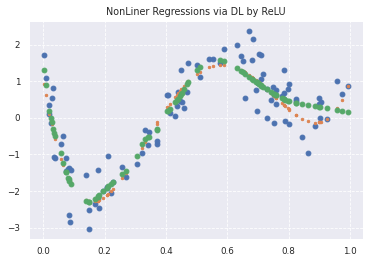

In [79]:
plt.title('NonLiner Regressions via DL by ReLU')
plt.plot(data, target, 'o')
plt.plot(data, true_func(data), '.')
plt.plot(x_train, y_pred, "o", label='predicted: deep learning')
#plt.legend(loc=2)

In [80]:
print(lasso_clf.coef_)

[-0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0. -0.
 -0. -0. -0. -0. -0. -0. -0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.
  0.  0.  0.  0.  0.  0.  0.  0.  0.  0.]
